# Variable Discretization

In [ ]:
Discretization, or binning, is the process of transforming continuous variables into discrete
variables by creating a set of contiguous intervals, also called bins, that span the range of
the variable values. Discretization is used to change the distribution of skewed variables
and to minimize the influence of outliers, and hence improve the performance of some
machine learning models.

How does discretization minimize the effect of outliers? Discretization places outliers into
the lower or higher intervals, together with the remaining inlier values of the distribution.
Hence, these outlier observations no longer differ from the rest of the values at the tails of
the distribution, as they are now all together in the same interval or bin. Also, if sorting
observations across bins with equal frequency, discretization spreads the values of a
skewed variable more homogeneously across the value range.

This repository covers unsupervised and supervised approaches to variable discretization# 

## Intervals of Equal Width

In equal-width discretization, the variable values are sorted into intervals of the same
width. The number of intervals is decided arbitrarily and the width is determined by the
range of values of the variable and the number of bins to create.

For example, if the values of the variable vary between 0 and 100, we can create five bins
like this: width = (100-0) / 5 = 20; the bins will be 0-20, 20-40, 40-60, 80-100. The first and final
bins (0-20 and 80-100) can be expanded to accommodate outliers, that is, values under 0 or
greater than 100 would be placed in those bins as well, by extending the limits to minus
and plus infinity.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

In [12]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The boundaries for the intervals should be learned using variables in the train set
only, and then used to discretize the variables in train and test sets. Let's divide the data into train and test sets and their targets:

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
 Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size = 0.3,
 random_state = 0)

We will divide the LSTAT continuous variable into 10 intervals. The width of the
intervals is given by the value range divided by the number of intervals. Let's calculate the range of the LSTAT variable, that is, the difference between its
maximum and minimum values:

In [39]:
lstat_range = X_train['LSTAT'].max() - X_train['LSTAT'].min()
lstat_range

35.25

Let's determine the interval width, which is the variable's value range divided by
the number of bins:

In [40]:
inter_width = int(lstat_range / 10)

The value of lstat_range divided by ten is 3.525. With int(), we capture the
integer part of the number, which is 3. 
Let's capture in new variables, the rounded minimum and maximum values of LSTAT:

In [41]:
min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

Let's print the minimum and maximum values and the interval width 

In [42]:
print(min_value, max_value, inter_width)

1 37 3


To divide a pandas Series into intervals, we will use pandas' cut() method,
which takes as arguments the limits of the intervals. Let's create a list with the interval limits using list comprehension and print out
the limits:

In [43]:
intervals = [i for i in range(min_value, max_value + inter_width, inter_width)]
intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

The output of the preceding block provides the limits that we need to pass to
pandas' cut() method. Let's discretize LSTAT and capture the discretized variable in a new column in
the dataframe:

In [44]:
X_train['lstat_disc'] = pd.cut(x = X_train['LSTAT'], bins = intervals, include_lowest = True)

We set include_lowest = True to include the lowest value in the first
interval. Let's print the top 10 observations of the discretized and original variable, side by side:

In [45]:
print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT    lstat_disc
141  34.41  (34.0, 37.0]
272   7.73   (7.0, 10.0]
135  16.96  (16.0, 19.0]
298   4.97    (4.0, 7.0]
122  17.93  (16.0, 19.0]
22   18.72  (16.0, 19.0]
68   13.09  (13.0, 16.0]
20   21.02  (19.0, 22.0]
437  26.45  (25.0, 28.0]
14   10.26  (10.0, 13.0]


We can see in the output that the 34.41 value was allocated to the interval 34-37,
the 7.73 value was allocated to the interval 7-10, and so on. In equal-width discretization, there is usually a different number of observations
per interval. Let's calculate the number of observations per interval:

In [46]:
X_train.groupby('lstat_disc')['LSTAT'].count()

lstat_disc
(0.999, 4.0]    28
(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(13.0, 16.0]    44
(16.0, 19.0]    45
(19.0, 22.0]    21
(22.0, 25.0]    17
(25.0, 28.0]     7
(28.0, 31.0]     9
(31.0, 34.0]     0
(34.0, 37.0]     4
Name: LSTAT, dtype: int64

In the output of the preceding code, we can see that different intervals have a
different number of observations:

Now, let's discretize LSTAT in the test set using pandas' cut() method:

In [47]:
X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins = intervals, include_lowest = True)

If the variable distribution in the train and test sets are similar, we should expect a
similar proportion of observations across the LSTAT intervals in the train and test
sets. Let's plot the proportion of observations across LSTAT intervals in the train and
test sets:

Text(0, 0.5, 'Number of observations per bin')

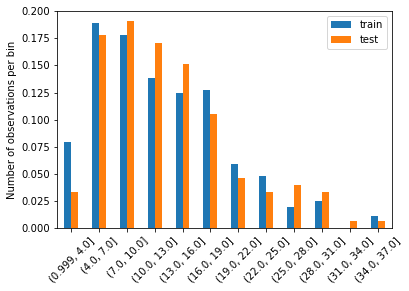

In [48]:
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis = 1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation = 45)
plt.ylabel('Number of observations per bin')

We can see in the output that the proportion of observations per interval is
approximately the same in the train and test sets. With Feature-engine, we can perform equal-width discretization in fewer lines of
code and for many variables at a time. Let's first divide the data into train and test
sets. Next, let's set up a discretizer. Let's create an equal-width discretizer to sort 3 continuous variables into 10
intervals:

In [49]:
disc = EqualWidthDiscretiser(bins = 10, variables = ['LSTAT', 'DIS', 'RM'])

Let's fit the discretizer to the train set so that the transformer learns the interval
limits for each variable:

In [50]:
disc.fit(X_train)

EqualWidthDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

We can inspect the limits of the intervals in the
disc.binner_dict_ attribute.

In [51]:
disc.binner_dict_

{'LSTAT': [-inf,
  5.255,
  8.78,
  12.305,
  15.83,
  19.355,
  22.88,
  26.405,
  29.93,
  33.455,
  inf],
 'DIS': [-inf,
  2.26943,
  3.36466,
  4.459890000000001,
  5.5551200000000005,
  6.65035,
  7.745580000000001,
  8.840810000000001,
  9.936040000000002,
  11.031270000000003,
  inf],
 'RM': [-inf,
  4.0828999999999995,
  4.6048,
  5.1267,
  5.6486,
  6.1705,
  6.692399999999999,
  7.2143,
  7.736199999999999,
  8.258099999999999,
  inf]}

Let's transform the variables in the train and test sets, that is, let's sort their
values into bins:

In [52]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

EqualWidthDiscretiser() returns a dataframe where the indicated variables
are discretized.
EqualWidthDiscretiser() returns a digit indicating whether the value
was sorted in the first, second, or tenth bin. If we want to return the bins
as an object, we need to indicate return_object = True when we set up
the discretizer earlier.
Let's now do equal-width discretization with scikit-learn. First, let's divide the
original data into train and test sets, as in step 3. Next, we set up a discretizer.
Let's create an equal-width discretizer with scikit-learn by setting its strategy
to uniform:

In [53]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'uniform')

Let's fit the discretizer to the train set so that the transformer learns the interval
limits for each variable:

In [54]:
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

Scikit-learn's KBinsDiscretiser() will discretize all of the variables in
the dataset, so we need to use the transformer only on the slice of the
dataframe that contains the variables to discretize.
Finally, let's transform the train and test sets:

In [55]:
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

We can inspect the bin boundaries learned by the transformer by
executing disc.bin_edges_.
Remember that scikit-learn returns NumPy arrays. To convert the array into a pandas
dataframe, we can execute train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM']).

## Sorting the variable values in intervals of equal frequency

Equal-frequency discretization divides the values of the variable into intervals that carry
the same proportion of observations. The interval width is determined by quantiles, and
therefore different intervals may have different widths. In summary, equal-frequency
discretization using quantiles consists of dividing the continuous variable into N quantiles,
with N to be defined by the user. This discretization technique is particularly useful for
skewed variables as it spreads the observations over the different bins equally. In this
recipe, we will perform equal-frequency discretization using pandas, scikit-learn, and
Feature-engine.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [57]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The boundaries for the intervals, that is, the quantiles, should be learned using
variables in the train set, and then used to discretize the variables in train and test
sets. Let's divide the data into train and test sets:

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size = 0.3,
 random_state = 0)

To divide the LSTAT variable into 10 quantiles, we use pandas qcut(), which
returns both the discretized variable and the quantile limits, which we capture as
a column of the dataframe and an individual variable, respectively:

In [60]:
X_train['lstat_disc'], intervals = pd.qcut(X_train['LSTAT'], 10,
labels = None, retbins = True)

In [61]:
print(intervals) 

[ 1.73   4.623  6.202  7.528  9.5   11.16  13.26  15.565 18.06  22.453
 36.98 ]


Let's print the top 10 observations of the discretized and original variable, side by
side:

In [62]:
print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


We can see in the output that the 34.41 value was allocated to the interval 22-36,
the 7.73 value was allocated to the interval 7.5-9.5, and so on.  Let's determine the proportion of observations per bin:

In [63]:
X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(1.729, 4.623]     0.101695
(13.26, 15.565]    0.101695
(15.565, 18.06]    0.101695
(22.453, 36.98]    0.101695
(4.623, 6.202]     0.098870
(6.202, 7.528]     0.098870
(11.16, 13.26]     0.098870
(9.5, 11.16]       0.096045
(18.06, 22.453]    0.096045
Name: lstat_disc, dtype: float64

Note how different intervals have a similar proportion of observations in the
output of the preceding code block

In [ ]:
Now, let's discretize LSTAT in the test set, using pandas' cut() method and the
interval limits determined in an earlier step

In [64]:
X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins = intervals)

We can compare the distribution of observations in the discretized
variables of the train and test sets, as we did earlier of the Dividing the
variable into intervals of equal width recipe.
With Feature-engine, we can perform equal-frequency discretization in fewer
steps and for many variables at the time. Let's first divide the data into train and
test sets like we did earlier. Next, let's set up a discretizer.
Let's create an equal-frequency discretizer to sort the values of three continuous
variables into 10 quantiles:

In [67]:
disc = EqualFrequencyDiscretiser(q = 10, variables = ['LSTAT', 'DIS', 'RM'])

Let's fit the discretizer to the train set so that it learns the quantile limits for each
variable:

In [68]:
disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

The transformer stores the limits of the intervals for each variable in a
dictionary in its disc.binner_dict_ attribute.

In [ ]:
disc.binner_dict_

Let's transform the variables in the train and test sets:

In [ ]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

EqualFrequencyDiscretiser() returns a digit indicating whether the
value was sorted in the first, second, or tenth bin. If we want to return the
bins as an object, we should indicate return_object = True when we set
up the discretizer in an earlier step
Let's now do equal-frequency discretization with scikit-learn. First, let's divide the
original data into train and test sets, as in an earlier. Next, we set up a discretizer. Let's create an equal-frequency discretizer by setting strategy to quantile and
the number of bins to 10:

In [ ]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')

Let's fit the discretizer to the train set so that it learns the interval limits:

In [69]:
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

EqualFrequencyDiscretiser(variables=['LSTAT', 'DIS', 'RM'])

Scikit-learn's KBinsDiscretiser() will discretize all of the variables in
the dataset, so we need to use the transformer only in the slice of the
dataframe that contains the variables of interest.
Finally, let's transform the train and test sets:

In [70]:
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

## Performing discretization followed by categorical encoding


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [78]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The interval limits and order should be learned from the train set, and then used
to transform variables in both train and test sets. Let's divide the data into train and test sets:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1), data['MEDV'], test_size = 0.3, random_state = 0)

Let's create an equal-frequency discretizer using Feature-engine to divide three
continuous variables into 10 quantiles:

In [80]:
disc = EqualFrequencyDiscretiser(q = 10, variables = ['LSTAT', 'DIS', 'RM'], return_object = True)

With return_object set to True, the transformer will return the
discretized variables cast as an object, which is needed to follow up with
the ordinal encoder. Let's fit the discretizer to the train set so that it learns the interval limits:

In [81]:
disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['LSTAT', 'DIS', 'RM'])

Let's discretize the variables in the train and test sets:

In [82]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Let's explore whether the discretized LSTAT variable shows a monotonic
relationship with the target.  Let's concatenate the transformed train set with the target, and plot the target
mean per interval of the variable DIS:

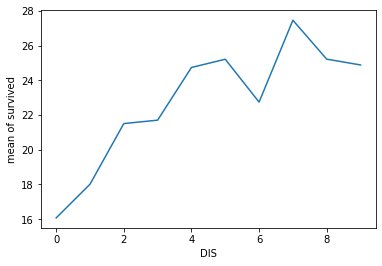

In [83]:
pd.concat([train_t, y_train],
axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')
plt.show()

In the output of the preceding code block, we can see that the relationship
between DIS intervals and the target MEDV is not monotonic. Let's now re-arrange the interval order following the target mean to create a
monotonic relationship: Let's create an ordinal encoder using Feature-engine:

In [85]:
enc = OrdinalEncoder(encoding_method = 'ordered')

Feature-engine's OrdinalEncoder() only works with
variables cast as an object. Let's fit the encoder to the train set with the discretized variables:

In [86]:
enc.fit(train_t, y_train)

OrdinalEncoder()

With the fit() method, the encoder will order the intervals according to the
mean target value per interval. 
OrdinalCategoricalEncoder() will automatically identify the
discretized variables as categorical variables and encode them if we leave
the variables argument set to None when initializing the transformer in
an earlier step. Let's encode the discretized variables:

In [87]:
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

## Allocating the variable values in arbitrary intervals

In [ ]:
Previously, we have seen how to create intervals based on variable values and
distribution. Sometimes, however, we want to divide the variables into intervals, the
boundaries of which are arbitrarily determined by the user. In this recipe, we will learn
how to discretize a variable into user pre-defined intervals using pandas and the Boston
House Prices dataset from scikit-learn.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [94]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let's divide the data into train and test sets:

In [111]:
X_train, X_test, y_train, y_test = train_test_split(Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size = 0.3,
random_state = 0)

Let's plot a histogram of the LSTAT variable to find out its value range:

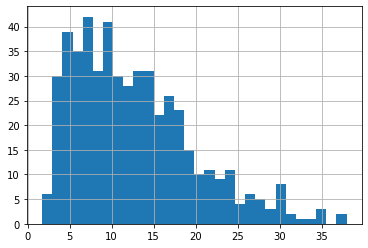

In [95]:
Boston['LSTAT'].hist(bins = 30)
plt.show()

LSTAT values vary from 0 to approximately 40

Let's create a list with the arbitrary interval limits, setting the upper limit to
infinity to accommodate bigger values:

In [96]:
intervals = [0, 10, 20, 30, np.Inf]

Let's create a list with the interval limits as labels, that is, strings:

In [97]:
labels = ['0-10', '10-20', '20-30', '>30']

Let's discretize the LSTAT variable into the pre-defined limits we determined in
a previous step, and capture it in a new variable that takes the label names we created previously as values:

In [98]:
Boston['lstat_labels'] = pd.cut(Boston['LSTAT'], bins = intervals, labels = labels, include_lowest = True)

Now, let's discretize the LSTAT variable into the pre-defined intervals and
capture it in a new variable that takes the interval limits as values:


In [99]:
Boston['lstat_intervals'] = pd.cut(Boston['LSTAT'], bins = intervals,
labels = None, include_lowest = True)

Let's inspect the first five rows of the original and discretized variables:

In [100]:
Boston[['LSTAT','lstat_labels', 'lstat_intervals']].head()

,LSTAT,lstat_labels,lstat_intervals
0,4.98,0-10,"(-0.001, 10.0]"
1,9.14,0-10,"(-0.001, 10.0]"
2,4.03,0-10,"(-0.001, 10.0]"
3,2.94,0-10,"(-0.001, 10.0]"
4,5.33,0-10,"(-0.001, 10.0]"


In the last two columns of the dataframe, we see the discretized variables; the first
one with the strings we created in a previous step as values, and the second one with the
interval limits as returned by pandas' cut() method. Finally, we can count the number of observations within each arbitrarily created interval:

In [101]:
Boston['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

## Performing discretization with k-means clustering

In discretization using k-means clustering, the intervals are the clusters identified by the kmeans algorithm. The number of clusters (k) is defined by the user. The k-means clustering
algorithm has two main steps. In the initialization step, k observations are chosen randomly
as the initial centers of the k clusters, and the remaining data points are assigned to the
closest cluster. In the iteration step, the centers of the clusters are re-computed as the
average points of all of the observations within the cluster, and the observations are
reassigned to the newly created closest cluster. The iteration step continues until the
optimal k centers are found. Here, we will perform k-means discretization with
scikit-learn, using the Boston dataset.

In [102]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [103]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The k-means optimal clusters should be determined using the train set, so let's
divide the data into train and test sets:

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
 Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size  =0.3,
random_state = 0)

Let's create a discretizer that uses k-means clustering to create 10 intervals by
setting strategy to kmeans:

In [105]:
disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal',
strategy = 'kmeans')

Let's fit the discretizer to the slice of the dataframe that contains the variables to
discretize, so that the transformer finds the optimal clusters for each variable:

In [106]:
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

Let's inspect the limits of each interval or cluster:

In [107]:
disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
              18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
              36.98      ])                                                   ,
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
               6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
              12.1265    ])                                                   ,
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77285276,
              6.14207435, 6.503811  , 6.91447956, 7.43717157, 8.1095049 ,
              8.78      ])                                               ],
      dtype=object)

Each array in the above output contains the limits for the 10 clusters for each of the 3 variables, LSTAT,
DIS, and RM. Let's discretize the variables in the train set and then capture the returned
NumPy array in a dataframe:

In [108]:
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

With print(train_t.head()), we can inspect the first five rows of the returned
dataframe, where we can see the number assigned to the different intervals or
clusters:

In [109]:
print(train_t.head())

   LSTAT  DIS   RM
0    9.0  0.0  2.0
1    1.0  2.0  6.0
2    4.0  0.0  5.0
3    0.0  6.0  5.0
4    4.0  0.0  4.0


Let's discretize the variables in the test set and then capture the returned NumPy
array in a dataframe:

In [110]:
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])
test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

## Using decision trees for discretization

Discretization with decision trees consists of using a decision tree to identify the optimal
bins in which to sort the variable values. The decision tree is built using the variable to
discretize, and the target. When a decision tree makes a prediction, it assigns an
observation to one of N end leaves, therefore, any decision tree will generate a discrete
output, the values of which are the predictions at each of its N leaves. Discretization with
decision trees creates a monotonic relationship between the bins and the target. In this
recipe, we will perform decision tree-based discretization using scikit-learn and then
automate the procedure with Feature-engine.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from feature_engine.discretisation import DecisionTreeDiscretiser

In [126]:
# Load Boston Data Set
Boston = pd.read_csv('C:/Python_Data_Sets/Boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let's divide the data into train and test sets:

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size = 0.3,
random_state = 0)

Let's assemble a decision tree to predict the MEDV target, setting the maximum
depth to 3 and random_state for reproducibility:

In [128]:
tree_model = DecisionTreeRegressor(max_depth = 3, random_state = 0)

For binary classification, we would use DecisionTreeClassifier()
instead. Let's fit the decision tree using the LSTAT variable to predict the MEDV target:

In [129]:
tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

Scikit-learn predictors take dataframes as inputs. A single variable is a
pandas Series, so we need to use the to_frame() method to transform it
into a dataframe and make it compatible with scikit-learn. Let's now predict MEDV from LSTAT and capture the output in a new variable in
the train set:

In [130]:
X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

If we created a classification tree, we would use predict_proba() and
retain the second column of the array, which is the probability of the
target being 1; hence, we would
execute: tree_model.predict_proba(X_train['LSTAT'].to_frame())[:,1]

Let's explore the end leaves, that is, bins, the tree created:

In [132]:
X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

The decision tree produced eight different distinct predictions for all of the
observations of the LSTAT variable in the output above. Let's now discretize the LSTAT variable in the test set:

In [133]:
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

Let's concatenate the test set with the target to plot the predictions versus the
mean of the MEDV target per bin:

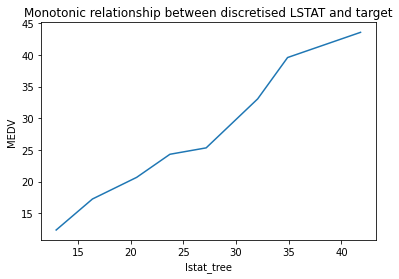

In [134]:
pd.concat([X_test, y_test], axis = 1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')
plt.show()

We can observe the monotonic relationship between the tree-derived intervals
and the MEDV target in the output of the preceding code block

Now let's implement decision tree discretization with Feature-engine. With
Feature-engine, we can discretize multiple variables in just a few lines of code.
First, we need to divide the dataset into train and test sets

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
Boston.drop('MEDV', axis = 1), Boston['MEDV'], test_size = 0.3,
random_state = 0)

Now, let's create a decision tree discretizer, which will optimize the maximum
depth of the tree based on the negative mean square error metric using 10 - fold
cross-validation, for the LSTAT, RM, and DIS variables:

In [141]:
treeDisc = DecisionTreeDiscretiser(cv = 10, scoring = 'neg_mean_squared_error',variables = ['LSTAT', 'RM', 'DIS'],
regression = True, param_grid = {'max_depth': [1,2,3,4]})

If we were setting up a classification tree, we would use
DecisionTreeClassifier() instead and set regression to False. We
would also have to use metrics for classification such as roc_auc_score.  Let's fit() the discretizer using the train set and the target so that the discretizer
finds the best decision trees, utilizing the provided grid of parameters for each of
the variables indicated in the list:

In [142]:
treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['LSTAT', 'RM', 'DIS'])

Let's inspect the best parameters for the tree trained for the LSTAT variable:

In [147]:
treeDisc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

In [ ]:
The output of the preceding code shows that the optimal depth for the decision
tree is 3: 

Let's transform the variables in the train and test sets:

In [148]:
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

In [ ]:
We can perform decision tree discretization with scikit-learn within a grid search to find the
optimal parameters to determine the most predictive decision tree. To do so, we first do the
imports, as done previously, and we add one additional import

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from feature_engine.discretisation import DecisionTreeDiscretiser
from sklearn.model_selection import GridSearchCV

Next, let's load the dataset and divide it into train and test sets, as done in previous steps, and now let's set up a parameter search grid.
Let's set up a dictionary with the parameters we would like to test, in this case, four different tree depths:

In [150]:
param_grid = {'max_depth': [1, 2, 3, 4]}

Let's now set up the decision tree inside a grid search with 5-fold cross-validation
and the negative mean squared error as a metric to optimize:

In [151]:
tree_model = GridSearchCV(DecisionTreeRegressor(random_state = 0),
 cv = 5,
 scoring = 'neg_mean_squared_error',
 param_grid = param_grid)

Let's fit the tree to the LSTAT variable and the target:

In [152]:
tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

Finally, let's transform the variables with the best decision tree:

In [153]:
X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())